#### To-do
- [ ] enhance spotify clustering
- [ ] add explanations for each cluster implementation

### import libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comparing Clustering Algorithm

Load "Data_to_cluster.csv" and describe the data it contains

In [101]:
df = pd.read_csv("../data/data_to_cluster.csv", sep=";", header=0)
df.head(), df.shape

(                    X                   Y
 0   6,776042854873671   2,161304630719832
 1  7,5376884422110555   8,778987597297073
 2   17,66729987563734   6,899374569638392
 3   17,04941289492438   7,418676151431526
 4   6,589132394034758  2,9788549115050427,
 (800, 2))

Plot the 2D Data

First let's converts datas

In [102]:
df["X"] = df["X"].str.replace(',', '.').astype(float)
df["Y"] = df["Y"].str.replace(',', '.').astype(float)

Text(0.5, 1.0, 'data to cluster')

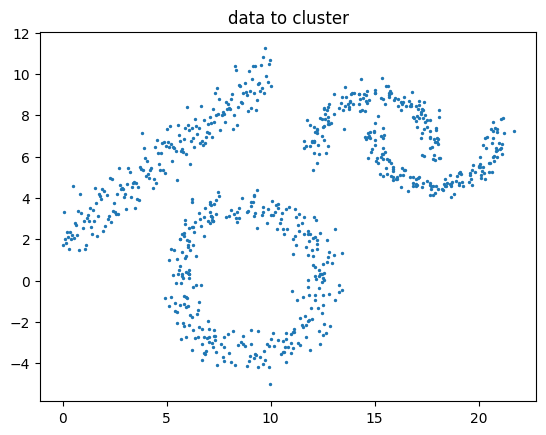

In [103]:
plt.scatter(df["X"], df["Y"], s=2)
plt.title("data to cluster")

Apply the different clustering algorithms from "scikit.cluster" and plot the result

### KMeans

In [135]:
from sklearn.cluster import k_means, KMeans

centroid, label, inertia = k_means(
    df, n_clusters=4, n_init="auto", random_state=0
)

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")

kmeans.fit(df)

labels = kmeans.predict(df)

kmeans, labels.shape, kmeans.cluster_centers_, df.head()

(KMeans(n_clusters=4, n_init='auto', random_state=0),
 (800,),
 array([[17.23853146,  6.64427287],
        [ 4.30202541,  3.49149171],
        [ 9.68247176,  7.14501165],
        [ 9.86891013, -1.34677632]]),
            X         Y
 0   6.776043  2.161305
 1   7.537688  8.778988
 2  17.667300  6.899375
 3  17.049413  7.418676
 4   6.589132  2.978855)

In [136]:
df.head(), labels[:5]

(           X         Y
 0   6.776043  2.161305
 1   7.537688  8.778988
 2  17.667300  6.899375
 3  17.049413  7.418676
 4   6.589132  2.978855,
 array([1, 2, 0, 0, 1], dtype=int32))

In [164]:
def plot_cluster(cluster_method, name, centers, labels=None):
    if labels is None :
        labels = cluster_method.predict(df)
    plt.scatter(df["X"], df["Y"], c=labels, cmap='viridis', s=10)

    if centers:
        plt.scatter(cluster_method.cluster_centers_[:, 0], cluster_method.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
    plt.title(f"{name} clustering with cluster centers")
    plt.show()

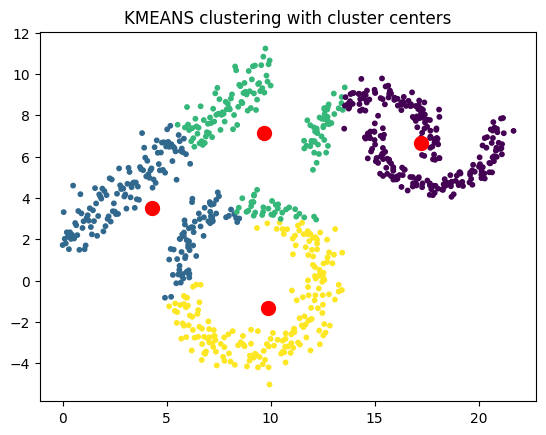

In [165]:
plot_cluster(kmeans, "KMEANS", True)

### Mini Batch KMeans

In [166]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=4,
    batch_size=45,
    n_init=10,
    max_no_improvement=10,
    verbose=0
)

mbk.fit(df)

labels = mbk.predict(df)

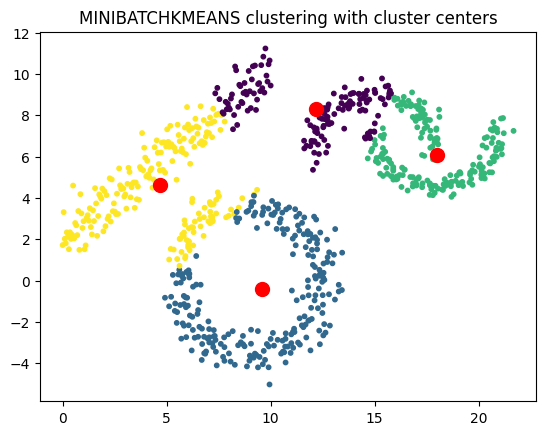

In [167]:
plot_cluster(mbk, name="MINIBATCHKMEANS", centers=True)

### Affinity Propagation

In [168]:
from sklearn.cluster import AffinityPropagation

afp = AffinityPropagation(
    random_state=5
)

afp.fit(df)

AffinityPropagation(random_state=5)

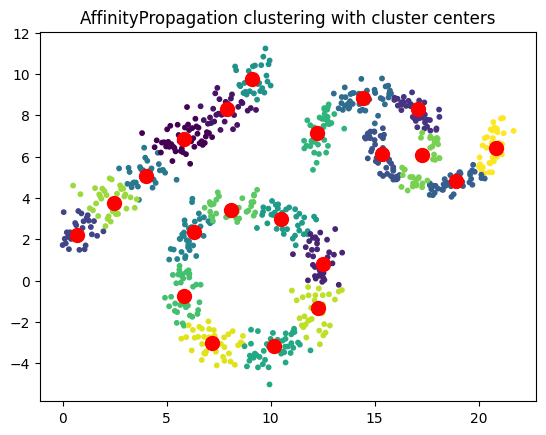

In [169]:
plot_cluster(afp,"AffinityPropagation", centers=True)

### Mean Shift Clustering

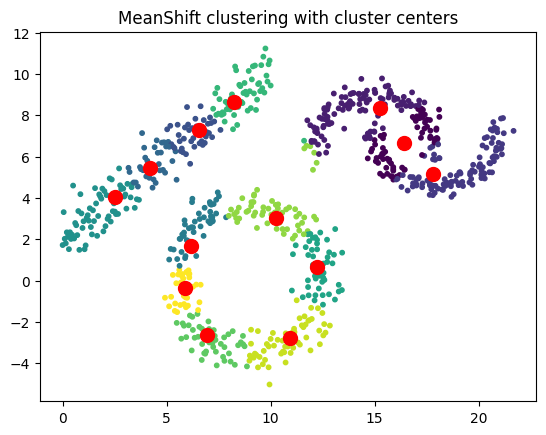

In [170]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=2)

clustering.fit(df)

plot_cluster(clustering, "MeanShift", centers=True)

### Spectral Clustering

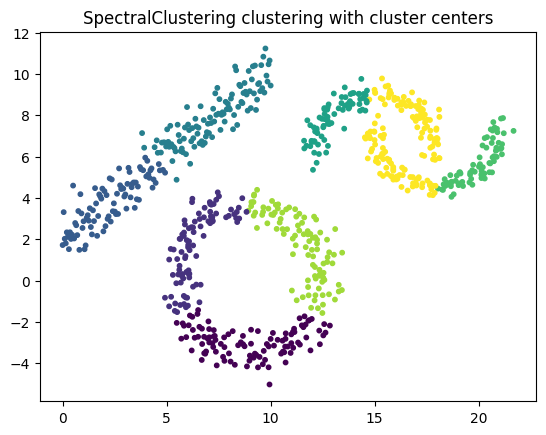

In [171]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(

)

clustering.fit(df)

labels = clustering.fit_predict(df)

plot_cluster(clustering, "SpectralClustering", centers=False, labels=labels)

 ### Ward Agglomerative Clustering

In [116]:
from sklearn.cluster import ward_tree

clustering = ward_tree(df) 

clustering.fit(df)

plot_cluster(clustering, "Ward Agglomerative")

AttributeError: 'tuple' object has no attribute 'fit'

### Agglomerative Clustering

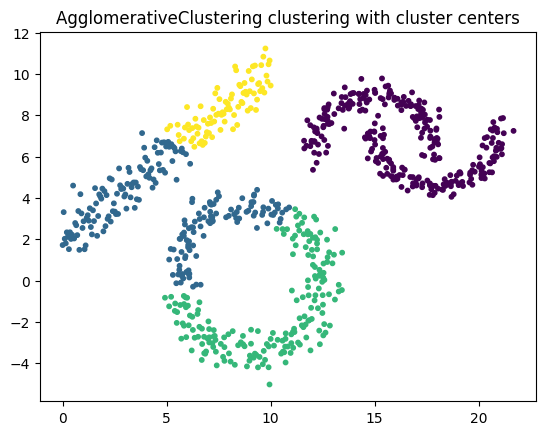

In [176]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4)

clustering.fit(df)

labels = clustering.fit_predict(df)

plot_cluster(clustering, "AgglomerativeClustering", centers=False, labels=labels)

### DBSCAN

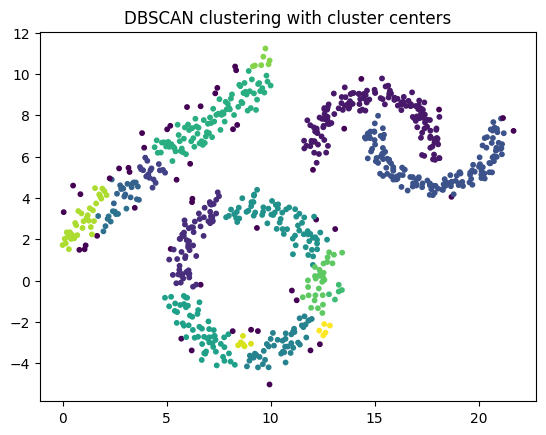

In [178]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN()

clustering.fit(df) 

labels=clustering.fit_predict(df)

plot_cluster(clustering, "DBSCAN", centers=False, labels=labels)

### HDBSCAN Clustering

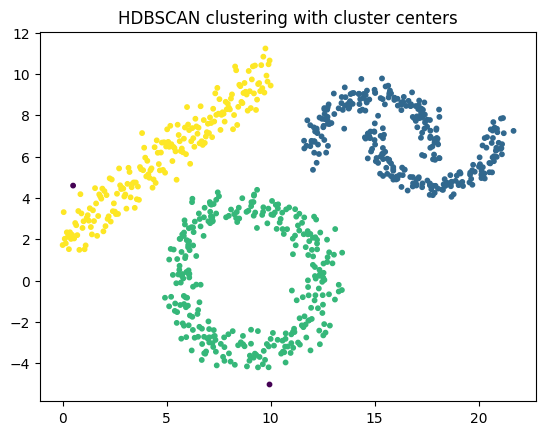

In [181]:
from sklearn.cluster import HDBSCAN

clustering = HDBSCAN()

clustering.fit(df) 

labels = clustering.fit_predict(df)

plot_cluster(clustering, "HDBSCAN", centers=False, labels=labels)

### Optics Clustering

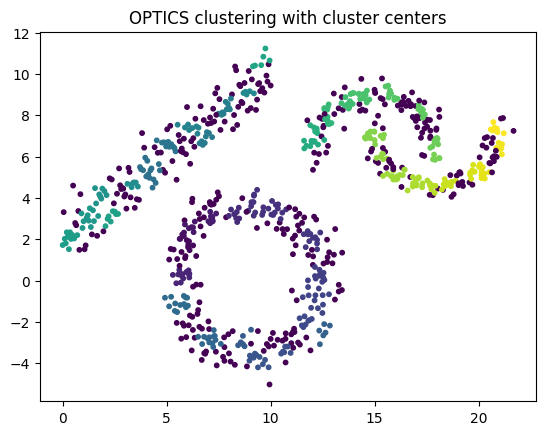

In [184]:
from sklearn.cluster import OPTICS

clustering = OPTICS()

clustering.fit(df) 

labels = clustering.fit_predict(df)

plot_cluster(clustering, "OPTICS", centers=False, labels=labels)

### Birch Clustering

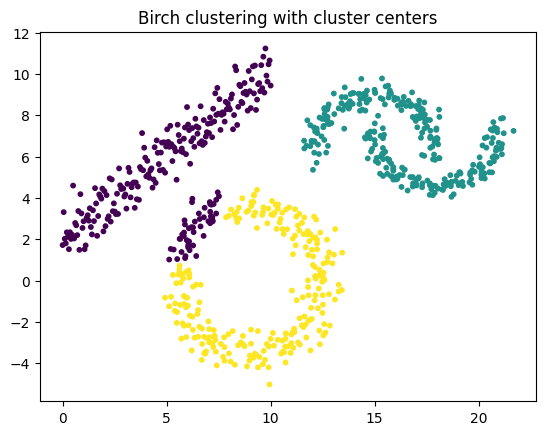

In [185]:
from sklearn.cluster import Birch

clustering = Birch()

clustering.fit(df) 

labels = clustering.fit_predict(df)

plot_cluster(clustering, "Birch", centers=False, labels=labels)

### Gaussian Mixture

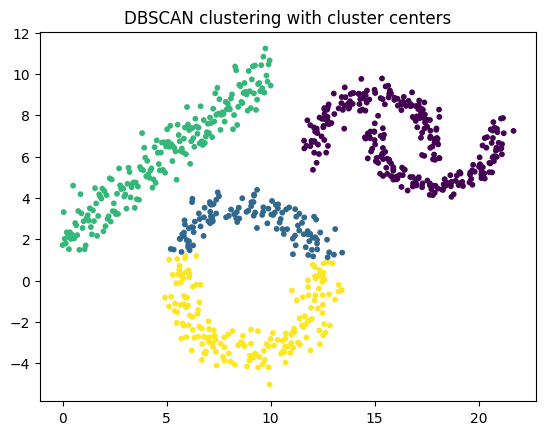

In [186]:
from sklearn.mixture import GaussianMixture

clustering = GaussianMixture(n_components=4, random_state=0)

clustering.fit(df) 

plot_cluster(clustering, "DBSCAN", centers=False)

### Now let's work

In [187]:
!pip install kagglehub

In [188]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsumat/spotify-top-2000s-mega-dataset")

print("Path to dataset files:", path)

100%|██████████| 65.5k/65.5k [00:00<00:00, 224kB/s]

Extracting files...
Path to dataset files: /home/dev/.cache/kagglehub/datasets/iamsumat/spotify-top-2000s-mega-dataset/versions/5


In [209]:
! cat /home/dev/.cache/kagglehub/datasets/iamsumat/spotify-top-2000s-mega-dataset/versions/5/Spotify-2000.csv

Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74
8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69
9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77
10,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82
11,Love Me Tender,Elvis Presley,adult 

In [229]:
df = pd.read_csv("../../../.cache/kagglehub/datasets/iamsumat/spotify-top-2000s-mega-dataset/versions/5/Spotify-2000.csv", sep=",")

df.head(), df.columns, df.shape


df.drop("Index", axis=1, inplace=True)

(<matplotlib.image.AxesImage at 0x7f5cd66b0550>,
 Index(['Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability',
        'Loudness (dB)', 'Liveness', 'Valence', 'Acousticness', 'Speechiness',
        'Popularity'],
       dtype='object'),
 Index(['Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability',
        'Loudness (dB)', 'Liveness', 'Valence', 'Acousticness', 'Speechiness',
        'Popularity'],
       dtype='object'))

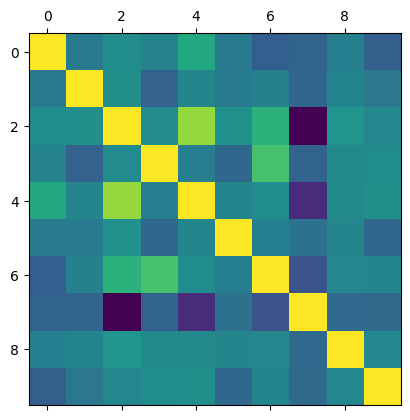

In [231]:
correlation_matrix = df.corr(numeric_only=True) # you must precise the numeric only boolean, it should be False by default...

plt.matshow(correlation_matrix), correlation_matrix.columns, correlation_matrix.index


In [234]:
df_filtered = df[[
    'Year', 
    'Beats Per Minute (BPM)', 
    'Energy', 
    'Danceability',
    'Loudness (dB)', 
    'Liveness', 
    'Valence', 
    'Acousticness', 
    'Speechiness',
    'Popularity'
    ]]

df_filtered

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,94,3,71
1,2000,135,79,50,-11,17,81,17,7,39
2,2001,168,69,66,-9,7,52,2,17,69
3,2007,173,96,43,-4,3,37,0,4,76
4,2002,106,82,58,-5,10,87,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63
1990,1958,175,76,36,-8,76,95,73,6,69
1991,1959,168,80,53,-9,31,97,74,7,74
1992,1959,174,26,45,-13,7,60,54,4,65


In [261]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
scaler.fit(df_filtered)
df_filtered_scaled = scaler.transform(df_filtered)


clustering = KMeans(n_clusters=len(df_filtered.columns))



clusters = clustering.fit_predict(df_filtered_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [262]:
df["Music Segments"] = clusters
df["Music Segments"] = df["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10"})



In [264]:
! pip install plotly

In [265]:
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Music Segments
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,NaN
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 8
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 8
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Cluster 1
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Cluster 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Cluster 2
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Cluster 2
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Cluster 2
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,Cluster 9


In [272]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Music Segments"].unique()):
    subset = df[df["Music Segments"] == i]
     
    PLOT.add_trace(go.Scatter3d(x = subset['Beats Per Minute (BPM)'],
                                y = subset['Energy'],
                                z = subset['Danceability'],      
                                text = subset['Title'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
    
    PLOT.update_traces(hovertemplate='Title %{text} <br> Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))